<a href="https://colab.research.google.com/github/VPanadero2000/MLUCM2223/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Preguntas:
1. debo comprobar si tengo datos duplicados?
2. no tengo que mirar nada de datos balanceados para regresión lineal así que de momento no lo hago no?

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns    #visualización
import matplotlib.pyplot as plt   #visualización
import scipy
import math
%matplotlib inline     
sns.set(color_codes=True)

### DESCRIPCIÓN DE LAS VARIABLES:
1. id - Unique ID for each home sold

2. date - Date of the home sale

3. price - Price of each home sold

4. bedrooms - Number of bedrooms

5. bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but 
no shower

6. sqft_living - Square footage of the apartments interior living space

7. sqft_lot - Square footage of the land space

8. floors - Number of floors

9. waterfront - A dummy variable for whether the apartment was overlooking the 
waterfront or not

10. view - An index from 0 to 4 of how good the view of the property was

11. condition - An index from 1 to 5 on the condition of the apartment,

12. grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.

13. sqft_above - The square footage of the interior housing space that is above 
ground level

14. sqft_basement - The square footage of the interior housing space that is below ground level

15. yr_built - The year the house was initially built

16. yr_renovated - The year of the house’s last renovation
zipcode - What zipcode area the house is in

17. zipcode

18. lat - Lattitude

19. long - Longitude

20. sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

21. sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [18]:
#Leemos la base de datos con la que vamos a trabajar:
df = pd.read_csv("kc_house_data.csv")
df.head(20) 
#nos llama la atención que variables como "bathrooms" y "floors" no sean enteras... (buscar cómo se codifica esto )

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [20]:
df_copy = df.copy()
df_copy.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


a continuación quito la variable id, que sólo sirve para identificar las entradas y no lo voy a usar para nada (obviamente). Tampoco serán relevantes para nuestro análisis la variable 'date', así como las variables relacionadas con la ubicación ('zipcode', 'lat', 'long').

In [21]:
df_copy = df_copy.drop(['id', 'date', 'zipcode', 'lat', 'long'], axis=1)
df_copy.head(15)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503
5,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,4760,101930
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,2238,6819
7,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,1650,9711
8,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,1780,8113
9,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,2390,7570


Ahora, me interesa convertir algunas variables categóricas en variables continuas. Otras, probablemente las elimine. Para convertir variables categóricas en continuas, me conviene mirar los mínimos y máximos que toman esas variables para poder reescalarlas... Hago tabla de estadísticos descriptivos:

In [22]:
df_copy.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,6210.000000,871200.000000


La variable waterfront es una variable binaria que nos indica si la casa dispone de vistas al mar o no. Por su parte, la variable view nos indica la calidad de las vistas de la vivienda. Considerando que la primera implica la segunda y que encarece lo mismo el mar que la sierra, decidimos trabajar únicamente con view.

La variable 'view' es un índice de valores enteros entre 0 y 4, con 0 indicando malas vistas y 4 indicando buenísimas vistas. A continuación reescalaremos esta variable para convertirla en una variable continua que tome valores entre 0 y 1, con 0 indicando pésimas vistas y 1 indicando buenísimas vistas

Lo mismo haremos con las variables 'condition' y 'grade', que indican la condición de la casa (a nivel de estado de la vivienda) y la "categoría", respectivamente:

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_copy[['view_s', 'condition_s', 'grade_s']] = scaler.fit_transform(df_copy[['view', 'condition', 'grade']])
df_copy = df_copy.drop(['view', 'condition', 'grade'], axis=1)

In [27]:
df_copy.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,view_s,condition_s,grade_s
0,221900.0,3,1.00,1180,5650,1.0,0,1180,0,1955,0,1340,5650,0.0,0.5,0.500000
1,538000.0,3,2.25,2570,7242,2.0,0,2170,400,1951,1991,1690,7639,0.0,0.5,0.500000
2,180000.0,2,1.00,770,10000,1.0,0,770,0,1933,0,2720,8062,0.0,0.5,0.416667
3,604000.0,4,3.00,1960,5000,1.0,0,1050,910,1965,0,1360,5000,0.0,1.0,0.500000
4,510000.0,3,2.00,1680,8080,1.0,0,1680,0,1987,0,1800,7503,0.0,0.5,0.583333


Ha continuación, estudiamos correlación entre las variables. Pudiera ser que variables como 'bedrooms' y 'bathrooms' tuviesen una alta correlación con variables como 'sqft_living'. De la misma manera, 'sqft_living' y 'sqft_lot' pueden estar correlacionadas con 'sqft_above' y 'sqft_basement'.

En el primero de los casos, pudiera ser interesante, por ejemplo, crear una variable que fuese habitaciones/superficie_habitable.... 

Lo vemos gráficamente:

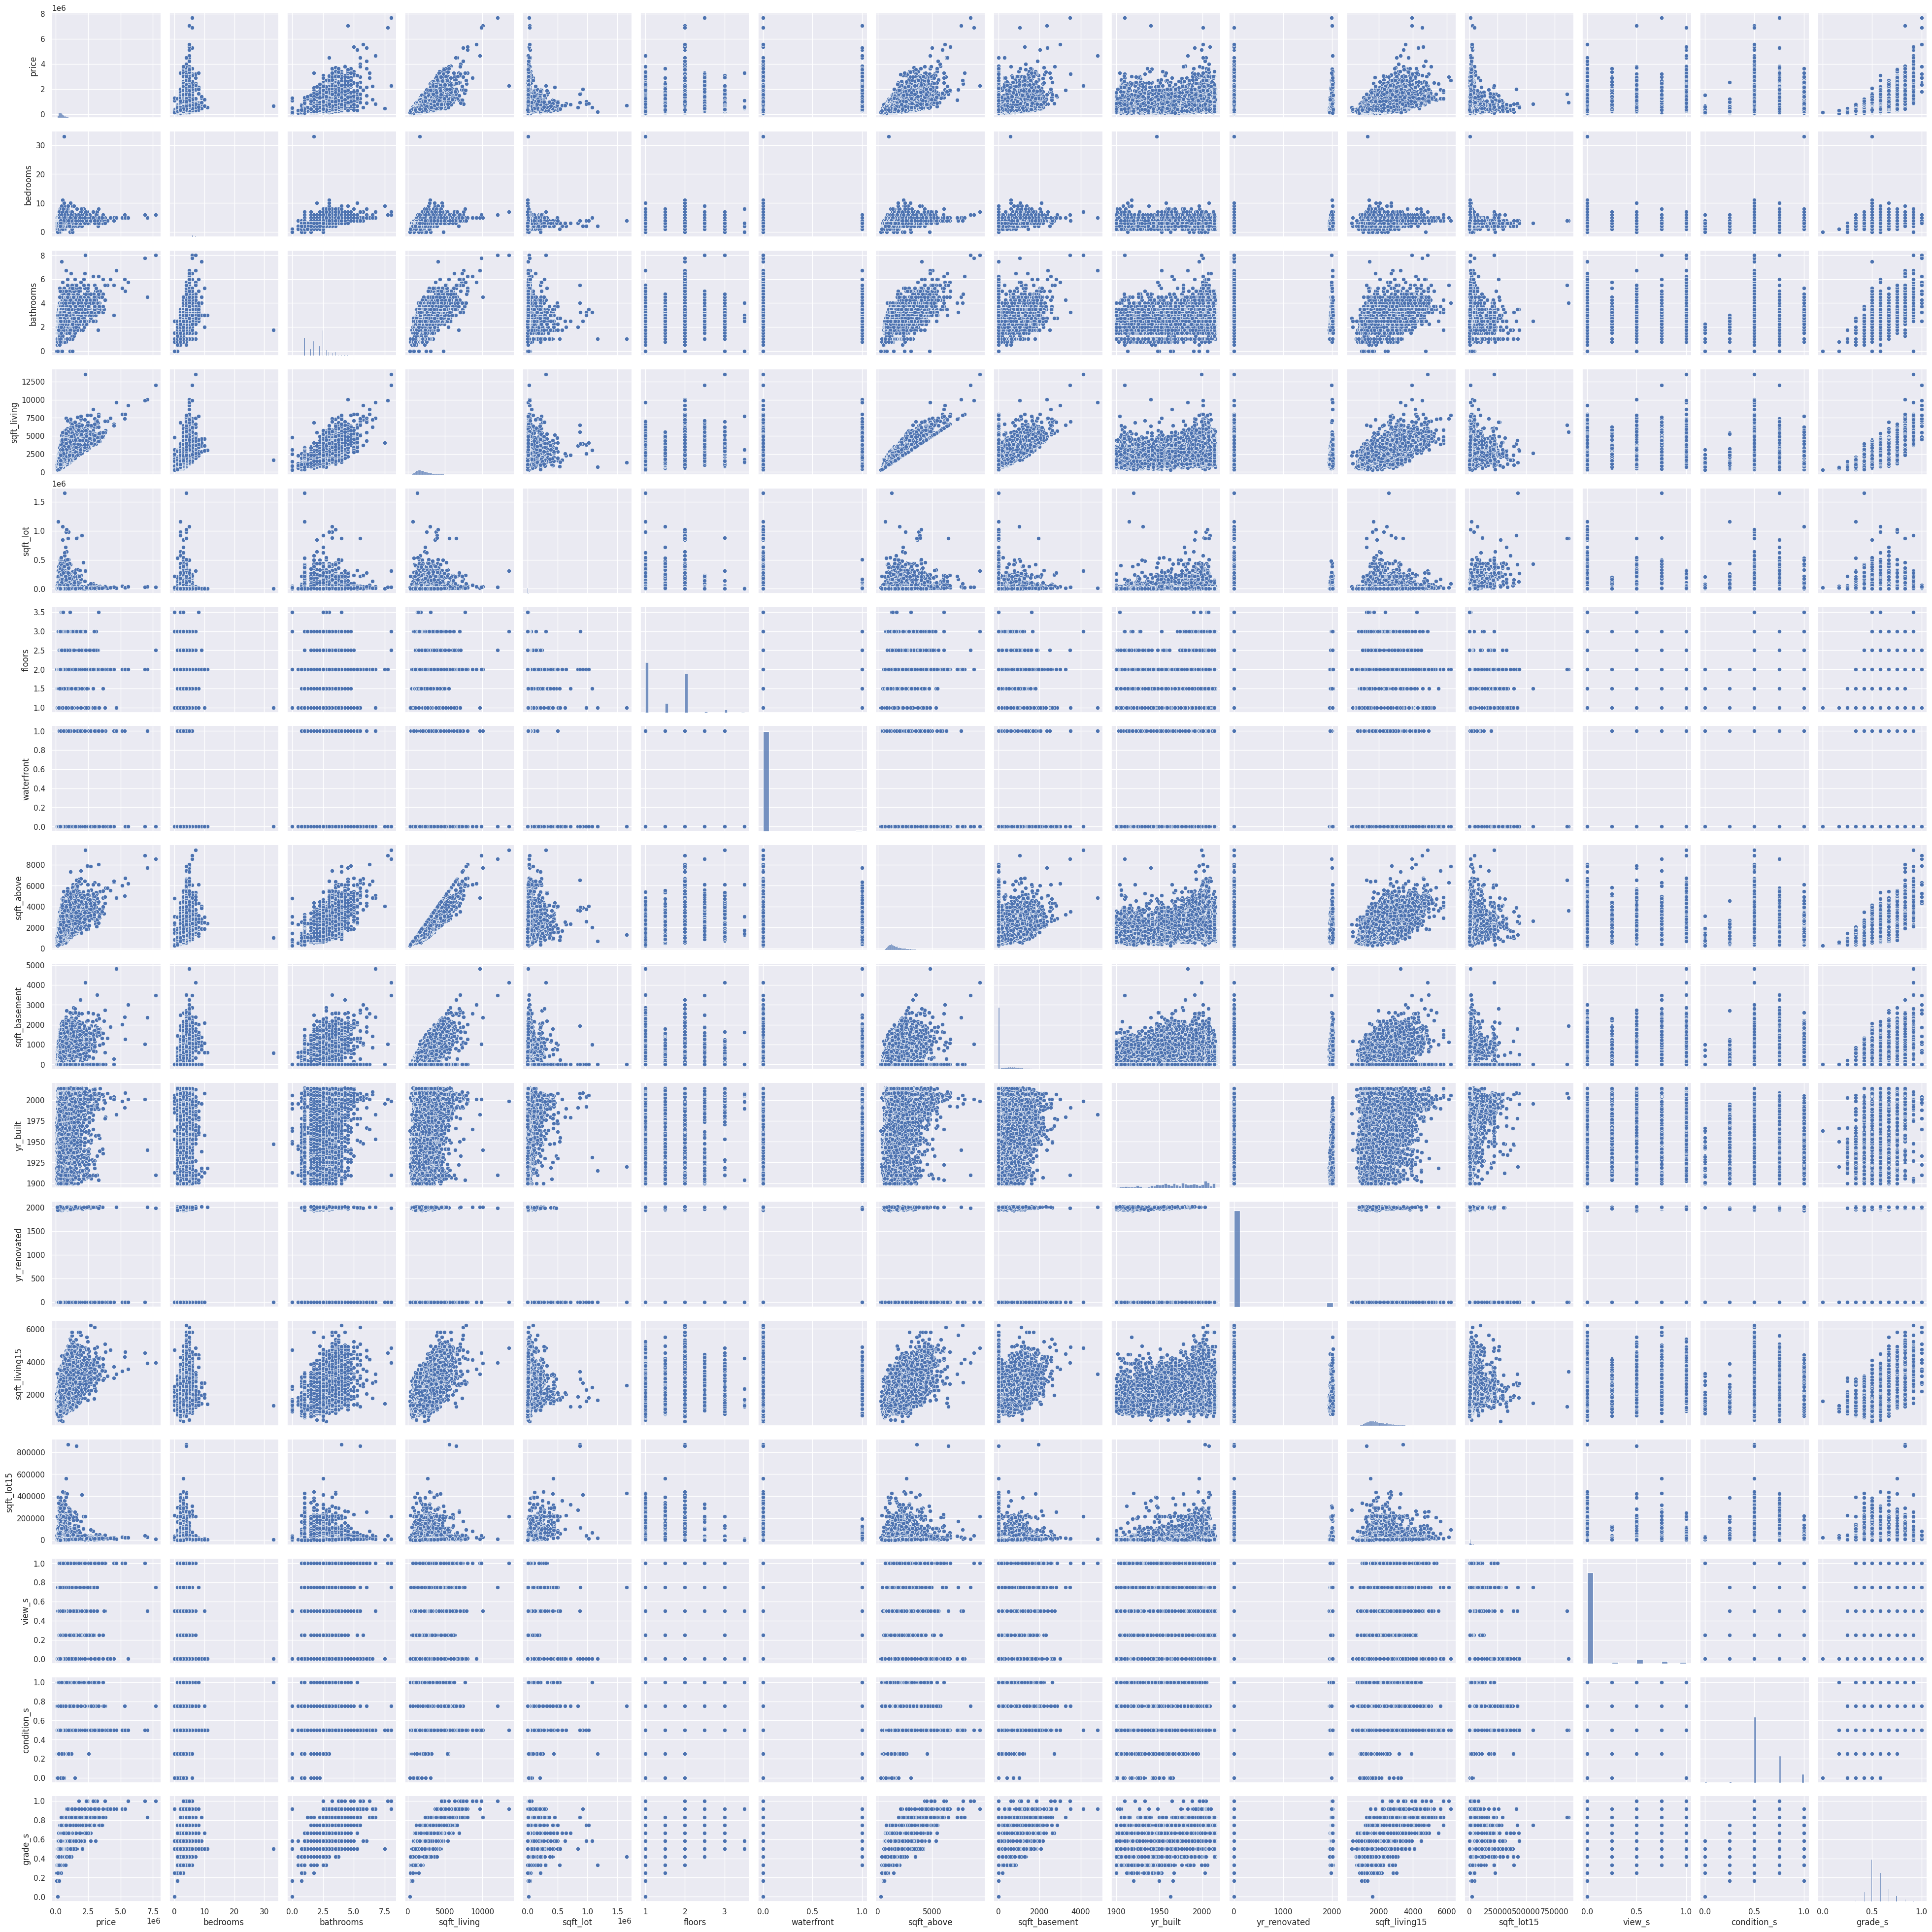

In [30]:
sns.pairplot(df_copy,vars = df_copy.columns)

Pues a priori, no parece que exista una correlación muy lineal entre bedrooms y sqft_living. Quizás, algo más con bathrooms, pero tampoco muy clara. 
Sin embargo, la relación entre sqft_living y sqft_above es prácticamente linear (luego vemos que hacemos con esto).

Vamos a sacar un heatmap:

<Axes: >

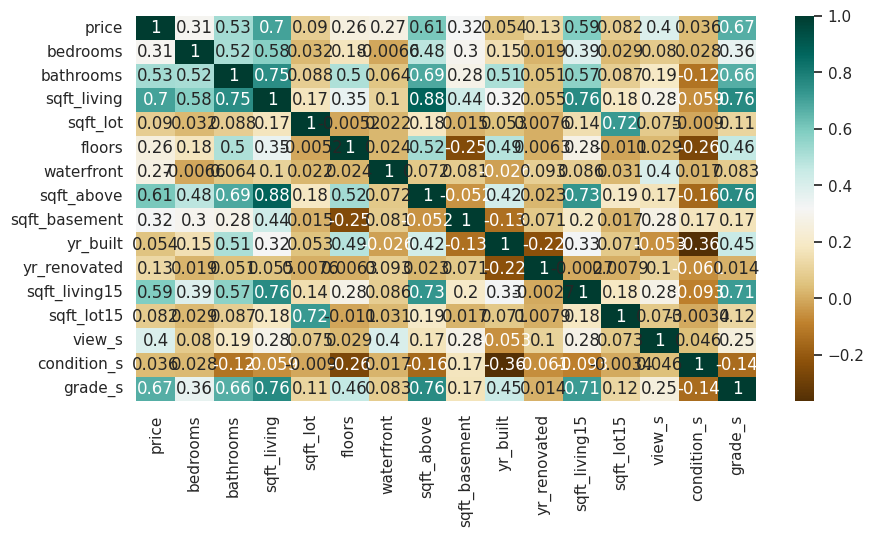

In [36]:
plt.figure(figsize=(10,5))
correlaciones= df_copy.corr() #de nuevo, para hacer las correlaciones, quitamos la variable "Clases"
sns.heatmap(correlaciones,cmap="BrBG",annot=True) #para mapa de calor


Creo que podemos decir que están correlados... creamos esas variables que proponíamos antes:

In [29]:
#en principio suponemos que la variable que más nos interesa en esta base de datos es la variable precios. Así, nos centramos ppalmente 
#en buscar la correlación entre esta variable y las demás:  
#QUE NO SE ME OLVIDE: UNA VEZ TENGA TODAS LAS VARIABLES PREPARADAS, PUEDO SELECCIONAR POR ORDEN DE IMPORTANCIA LAS QUE YO CONSIDERE 
#INTERESANTES PARA MI MODELO DE REGRESIÓN EN FUNCIÓN DE SU CORRELACIÓN CON LA VARIABLE OBJETIVO PRECIOS

matriz_corr = df_copy.corr()
matriz_corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,view_s,condition_s,grade_s
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.605567,0.323816,0.054012,0.126434,0.585379,0.082447,0.397293,0.036362,0.667434
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.477600,0.303093,0.154178,0.018841,0.391638,0.029244,0.079532,0.028472,0.356967
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.685342,0.283770,0.506019,0.050739,0.568634,0.087175,0.187737,-0.124982,0.664983
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.876597,0.435043,0.318049,0.055363,0.756420,0.183286,0.284611,-0.058753,0.762704
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.183512,0.015286,0.053080,0.007644,0.144608,0.718557,0.074710,-0.008958,0.113621
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.523885,-0.245705,0.489319,0.006338,0.279885,-0.011269,0.029444,-0.263768,0.458183
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.072075,0.080588,-0.026161,0.092885,0.086463,0.030703,0.401857,0.016653,0.082775
sqft_above,0.605567,0.477600,0.685342,0.876597,0.183512,0.523885,0.072075,1.000000,-0.051943,0.423898,0.023285,0.731870,0.194050,0.167649,-0.158214,0.755923
sqft_basement,0.323816,0.303093,0.283770,0.435043,0.015286,-0.245705,0.080588,-0.051943,1.000000,-0.133124,0.071323,0.200355,0.017276,0.276947,0.174105,0.168392
yr_built,0.054012,0.154178,0.506019,0.318049,0.053080,0.489319,-0.026161,0.423898,-0.133124,1.000000,-0.224874,0.326229,0.070958,-0.053440,-0.361417,0.446963


A continuación, realizamos algunos análisis gráficos para sacar algunas conclusiones *intuitivas*:

En primer lugar, realizamos un histograma de los precios (porque, en concreto, nos parece una de las variables más interesantes). Vemos una cierta asimetría positiva que podría denotar la existencia de datos atípicos (por ejemplo, una minoría de viviendas excesivamente caras en comparación a la gran mayoría). 

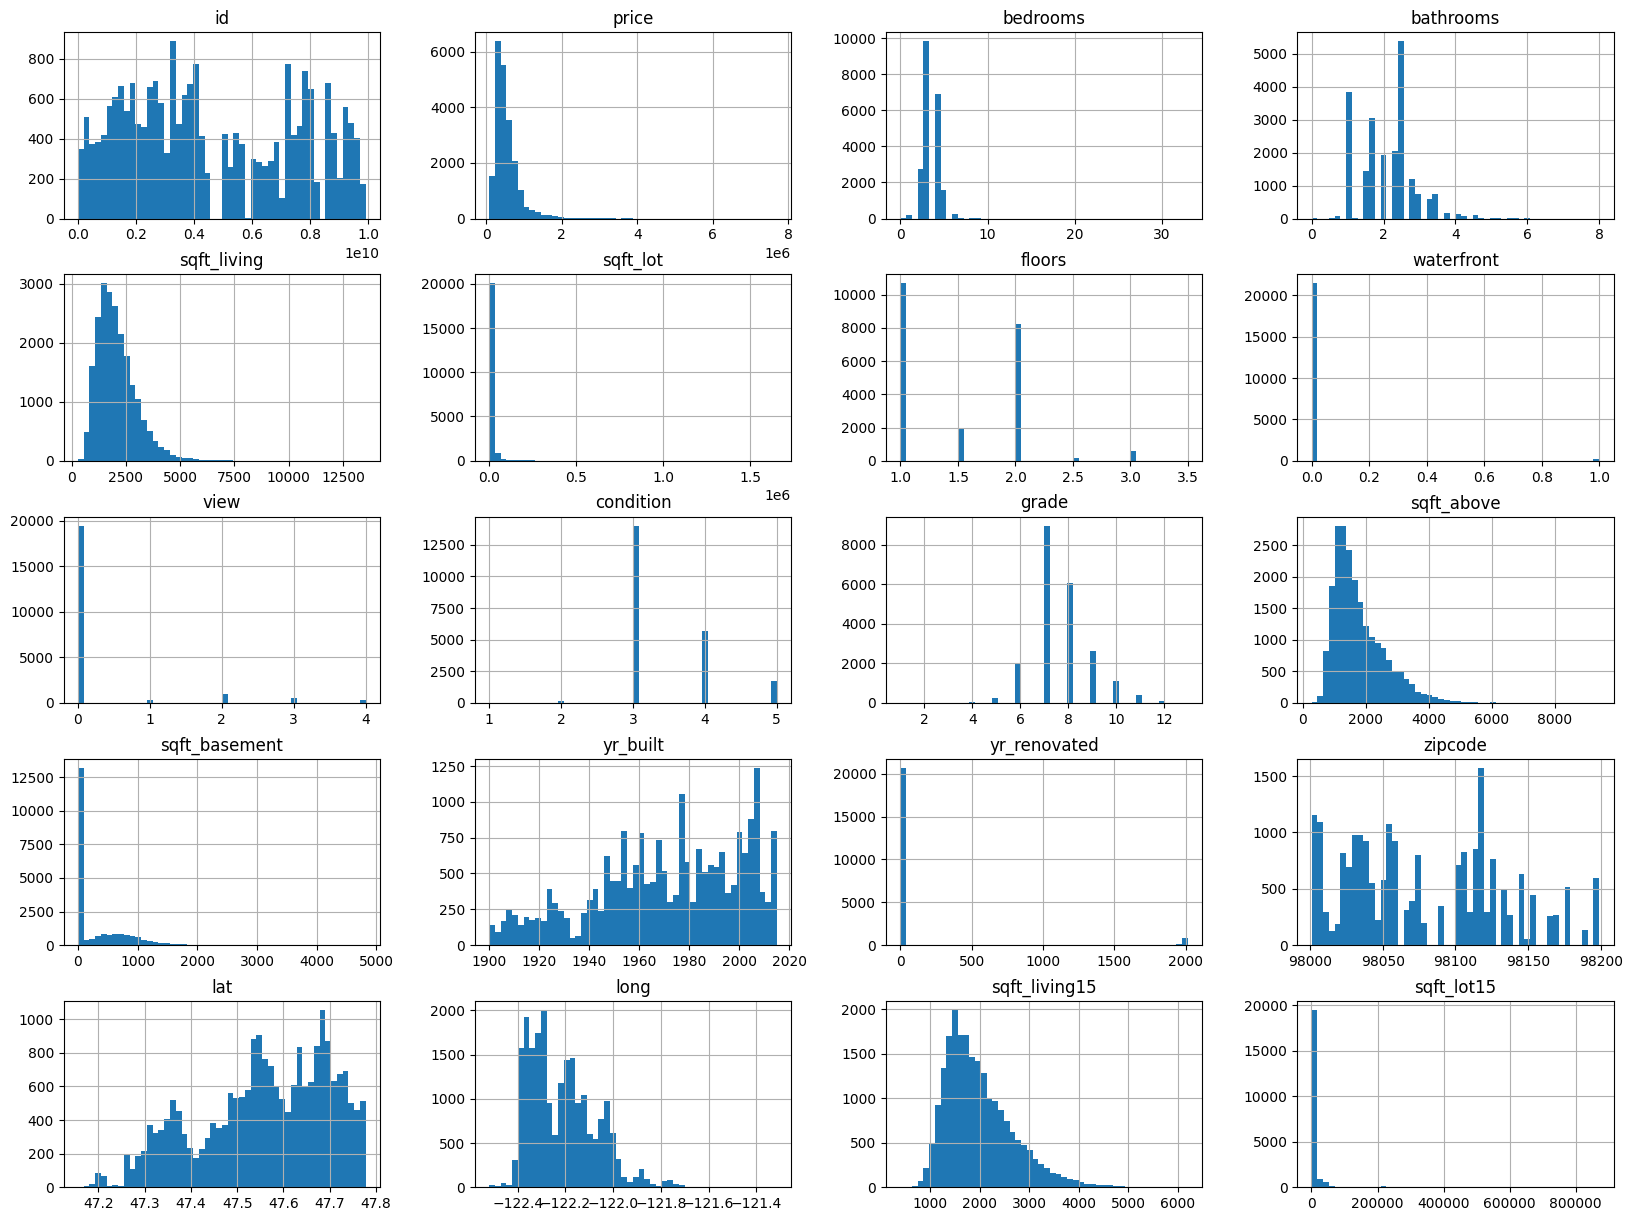

In [ ]:
#hacemos histogramas
df.hist(bins=50, figsize=(20,15))
plt.show()

Ordenamos las correlaciones de la variable price con el resto de variables para identificar mejor las variables más correlacionadas con la misma:

In [ ]:
matriz_corr["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

Como podíamos intuir, la superficie habitable es la variable más correlacionada con el precio de la vivienda, seguida de la variable grade (calidad de la construcción)...

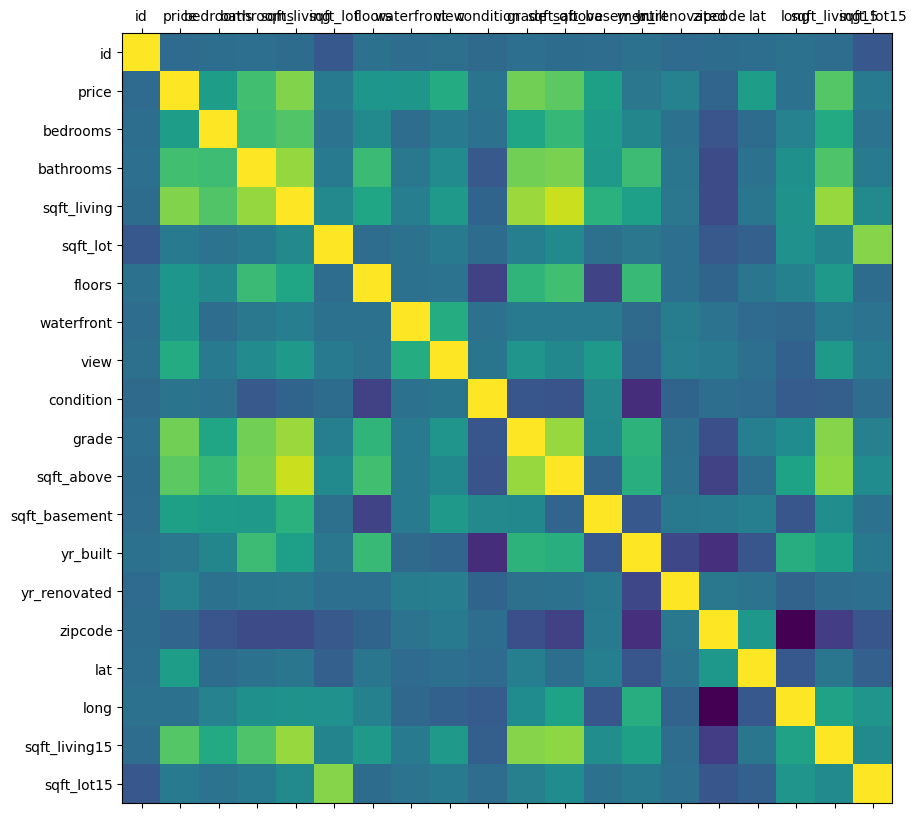

In [ ]:
#podemos representar gráficamente la matriz de correlaciones completa:
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(matriz_corr)
plt.xticks(range(len(matriz_corr.columns)), matriz_corr.columns);
plt.yticks(range(len(matriz_corr.columns)), matriz_corr.columns);
#podemos ver algunos grupetes que lógicamente estan correlacionados: bathrooms, bedrooms, price y sqft_living
#tb el de estas variables con grade, etc....

In [ ]:
#tb podemos pintar como hace él algunas correlaciones (plotearlas en gráfico) entre algunas de las variables... 
#preguntar si nos va a aportar mucho....